### Initialize Qiskit

In [3]:
!pip install qiskit
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer import AerSimulator
import qiskit.quantum_info as qi

## Quantum Circuit with N Qubits to Print the Statevector


In [5]:
n=2
qc = QuantumCircuit(n)
qc.h(0)
qc.h([0,1])
qc.cx(0,1)
qc.x(1)
qc.draw()

┌───┐┌───┐          
q_0: ┤ H ├┤ H ├──■───────
     ├───┤└───┘┌─┴─┐┌───┐
q_1: ┤ H ├─────┤ X ├┤ X ├
     └───┘     └───┘└───┘

Print Final Statevector

In [6]:
stv1 = qi.Statevector.from_instruction(qc)
sim = AerSimulator()
options = {'method': 'statevector'}
execute(qc, sim, backend_options=options)
stv1.draw('latex', prefix='Statevector1:')

<IPython.core.display.Latex object>

Print on Blochsphere

Statevector([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


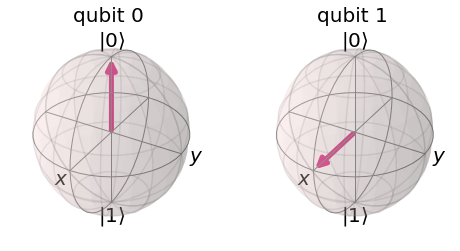

In [7]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, backend=simulator,shots=1000000).result()
statevector = result.get_statevector()
print(statevector)
%matplotlib inline
qc.draw(output='mpl')
plot_bloch_multivector(statevector)

## Using Quantum and Classical Registers to Print the Probability Histogram

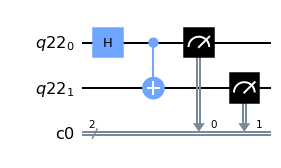

In [8]:
q_2=2
c=2
qr=QuantumRegister(q_2)
cr=ClassicalRegister(c)
qc_2 = QuantumCircuit(qr,cr)
%matplotlib inline
qc_2.draw(output='mpl')
qc_2.h(qr[0])
qc_2.draw()
qc_2.cx(qr[0],qr[1])
qc_2.draw(output='mpl')
qc_2.measure(qr,cr)
qc_2.draw(output='mpl')

Print Final Histogram

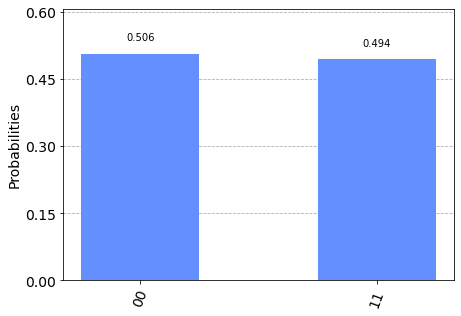

In [9]:
simulator = Aer.get_backend('qasm_simulator')
result=execute(qc_2,backend=simulator,shots=2000).result()
plot_histogram(result.get_counts(qc_2))

## Send to and Run on IBM Quantum Computer

In [10]:
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

In [11]:
# Insert your account number here.
IBMQ.save_account('45e857dfe2ef97f2571a4ad20e15ec8f99442e4da91596b59685a2a06e174fc892e7c89fa0623c96627c73f99750f3385912c18b1c0628f56cf11a7b2f170989')
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()
qcomp = provider.get_backend('ibmq_bogota')
job = execute(qc_2, backend=qcomp)
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(qc_2))

QiskitBackendNotFoundError: ignored